# Computer Vison: Line Extraction

There exists a lot of methods allowing to detect the edges of an image. In this work, we describe several of these methods. We explain how their works and show the influence of their hyperparameters. We show that well-chosen parameters allow to extract edges on images sharing the same properties. After some processing, we thus generate black-and-white images where the wite pixels represents edges.

From these new images, we finally aim at finding the edges being on straight lines. We have explored the Hough methods and its deterministic declination. We show that, once again, using the good hyperparameters for the methods, it is possible to extract the equations of the edges being straight lines.

Finally, using a pixel-classifier, we remove from the original image the edges being lines.


In [1]:
import cv2
import numpy as np
import tools
import matplotlib.cm as cm   
from ipywidgets import interact, fixed

from image import *
from edge import *
from line import *

from notebook_utils import *

## Edges Detection

As explained earlier, we applied different methods allowing to extract the pixels located on an edge. Simply using these methods does not show good performances. Image pre and post-precessing is needed. 

Let's first describe the working of the different methods we used:
* **Naive Gradient**
    This method consists in applying a liner filter computing the partial derivate of the image in each pixel according to the a center finite difference. It basically consists in computing the difference of the two neighbouring pixels for both directions. The gradient is then computed as the average of the absolute value of the gradients in the two directions.

* **Soble Gradient** 

* **Scharr Gradient**

* **Beucher** 

* **Canny**

* **Stacking** 

We will now describe the influence of the hyperparameters of the methods on he performances. The description is done for images of two different classes. The following tool allows to visualize the impact of the variations of parameters.

In [2]:
ui, out = build_ui_edges()
display(ui, out)

Output()

### Building edges

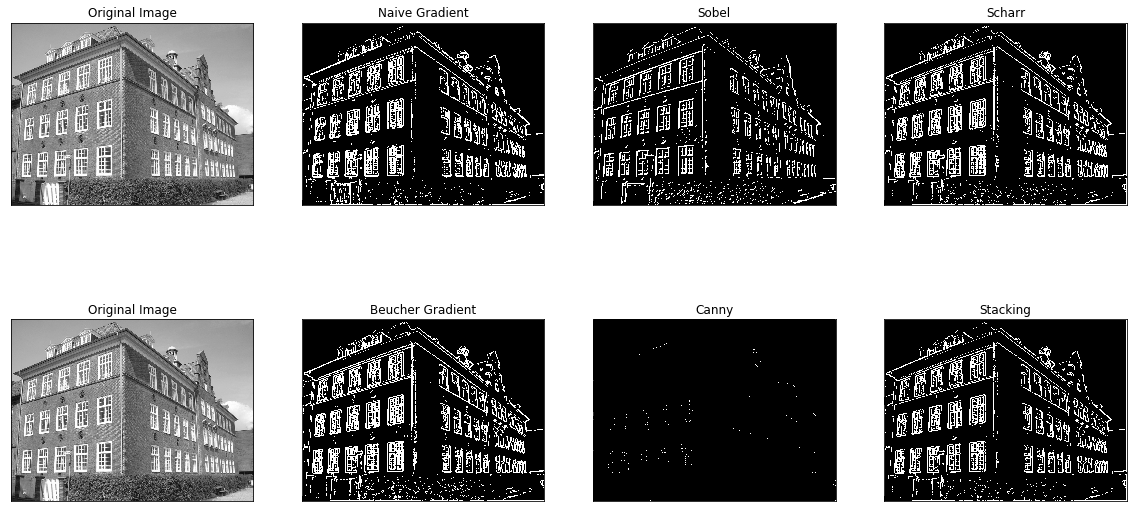

In [3]:
img = load_gray_img("img/building.png")

naive_grad = get_optimal_grads("building", "Naive Gradient")
sobel_grad = get_optimal_grads("building", "Sobel")
scharr_grad = get_optimal_grads("building", "Scharr")
canny_grad = get_optimal_grads("building", "Canny")
beucher_grad = get_optimal_grads("building", "Beucher")
stacking_grad = get_optimal_grads("building", "Stacking")

tools.multiPlot(2, 4, 
        (img, naive_grad, sobel_grad, scharr_grad, img, beucher_grad, canny_grad, stacking_grad),
        ('Original Image', 'Naive Gradient', 'Sobel', 'Scharr', 'Original Image', 'Beucher Gradient', 'Canny', 'Stacking'),
        cmap_tuple=(cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray))

### Sudoku edges

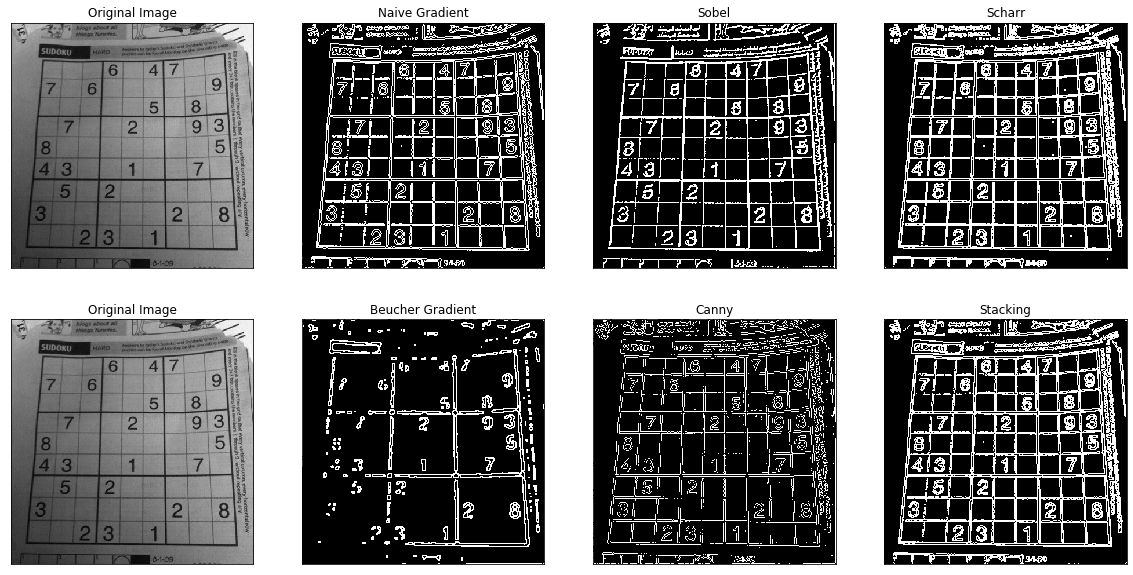

In [4]:
img = load_gray_img("img/sudoku.png")

naive_grad = get_optimal_grads("sudoku", "Naive Gradient")
sobel_grad = get_optimal_grads("sudoku", "Sobel")
scharr_grad = get_optimal_grads("sudoku", "Scharr")
canny_grad = get_optimal_grads("sudoku", "Canny")
beucher_grad = get_optimal_grads("sudoku", "Beucher")
stacking_grad = get_optimal_grads("sudoku", "Stacking")

tools.multiPlot(2, 4, 
        (img, naive_grad, sobel_grad, scharr_grad, img, beucher_grad, canny_grad, stacking_grad),
        ('Original Image', 'Naive Gradient', 'Sobel', 'Scharr', 'Original Image', 'Beucher Gradient', 'Canny', 'Stacking'),
        cmap_tuple=(cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray))

### Other classes of images

## Edges Detection Using Contour Detection

Contour following algorithms are a class of method allowing to extract the contour of the different objects in an image. In opposition with edge detection, it uses the topology of the image and the objects to build the frontier between the object and the backward scene. The algorithm used in the following builds the frontier dynamically by following the pixels considered as part of the frontier.

This method is thus an alternative way of extracting the edges of an image. 

In [5]:
ui, out = build_ui_edges("Following")
display(ui, out)

Output()

The method is based on two parameters. A lower and an upper threshold. The lower threshold defines a minimal intensity to apply the contour following algorithm. For a low threshold, lots of contours are detected. Most of them being irrelevant. The high threshold is the maximal intensity and shall be set to 255. 

Applying an addition Thresholding doesn't allow to increase much the performance. Neither does a preprocessing with high pass or low pass filtering. 

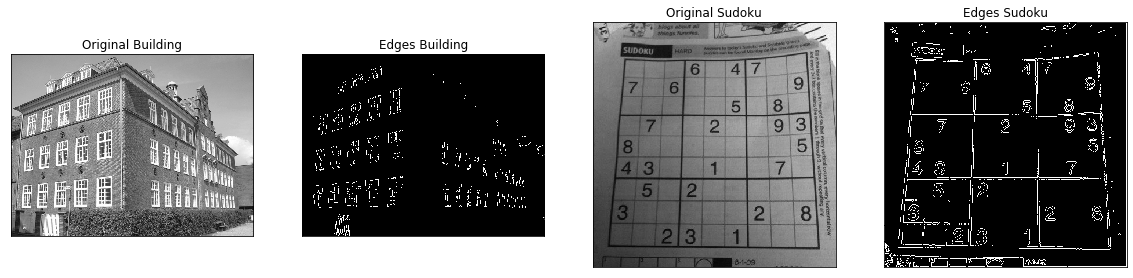

In [6]:
img_0 = load_gray_img("img/building.png")
img_1 = load_gray_img("img/sudoku.png")

edge_img_0 = get_optimal_grads("building", "Following")
edge_img_1 = get_optimal_grads("sudoku", "Following")

tools.multiPlot(1, 4, 
        (img_0, edge_img_0, img_1, edge_img_1),
        ('Original Building', 'Edges Building', 'Original Sudoku', 'Edges Sudoku'),
        cmap_tuple=(cm.gray, cm.gray, cm.gray, cm.gray))

On the building, having a high lower threshold of 240 results in the best performances. For the sudoku, the threshold of 45 yields the best contours. Let's nevertheless remark that none reaches good performances that could be compared with the previous method. Also, the parameters are completely different for the two different images.

This method's first use is not te extract edges but more to detect the contour of objects in a scene. Even though these two tasks are very similar, they are not achieved using the same methods.


## Line Extraction

We have seen that the previous methods allow to extract an image where the pixels being on an edge are white and all others black. In particular, the Sobbel gradient yields the most accurate figure. From this image we aim at finding the pixels placed on a line. A method for achieving this result is to build the set of lines going through each white dot. If many lines share the same parametrization, they correspond to an edge where each pixels are on a same straight line. This method corresponds to the so-called Hough Line Transform.

The Hough Line Transform extracts a set of lines corresponding to the edges in a picture. Three main parameters influence the result of the transformation. First, the set of lines build from each pixel will never share the exact same parametrization even though they correspond to the same line. It is due to the inaccuracies in the image and its gradient transformation.Two tolerance parameters are thus used. The first corresponds to the error allowed in the direction of the lines. The second is the tolerance in radial coordinate. Finally, a threshold defines how many lines must share the same parametrization, to accept this parametrization to be consistent with an edge.

The Hough method has, nevertheless, a very annoying drawback. A line is extracted rather than a segment. First, it is thus difficult to extract the edges from this method and the number of points to accept the line is thus difficult to fix in order to take into account the length of the edges.

The Progressive Probabilistic Hough Transform is a variant of the previous method. It consists in sampling random points and looking at the possibility for them to be due to noise. This is repeated taking into account a minimal length and a number of positive votes necessary. A maximal gap between pixels on a line is also considered. This method is implemented and allows to detect the extreme points of the lines. 


### Hough Line Transform

In [7]:
interact(lambda image, rho, theta, threshold: hough_determinist_print(get_optimal_grads(image, "Sobel"),
                                                                      load_gray_img("img/%s.png" % image),
                                                                      float(rho) / 10.0, 
                                                                      theta, 
                                                                      threshold), 
         image = ["building", "sudoku", "soccer", "road", "pcb"],
         rho = (1, 10, 1), 
         theta = (np.pi / 360, np.pi / 90, np.pi / 1440), 
         threshold = (200, 400, 20))
pass

interactive(children=(Dropdown(description='image', options=('building', 'sudoku', 'soccer', 'road', 'pcb'), v…

For the building, a small rho is preferred. It strongly reduces the irrelevant edges. Since all the edges are directed in three main directions, a large theta can be used. It thus states that high errors are allowed. Let's remark that there is a tradeoff in order to reject the noisy points. The method detects many irrelevant lines. Choosing a value around 0.015 yields good results. In order to reject them, a large threshold can be chosen, 360 is a good trade-off. It nevertheless results in ignoring many edges. 

For the sudoku, it is another story. The Sobel gradient image is much cleaner and lower threshold can be used. An angular error of 0.015 and a threshold of 240 yields excellent results.

This method is very image dependent. In the case of the clean sudoku image, the results are very good and quite insensitive to the hyperparameters. For the building, it performs poorly, and the parameters must be very well chosen to reach some good performance.


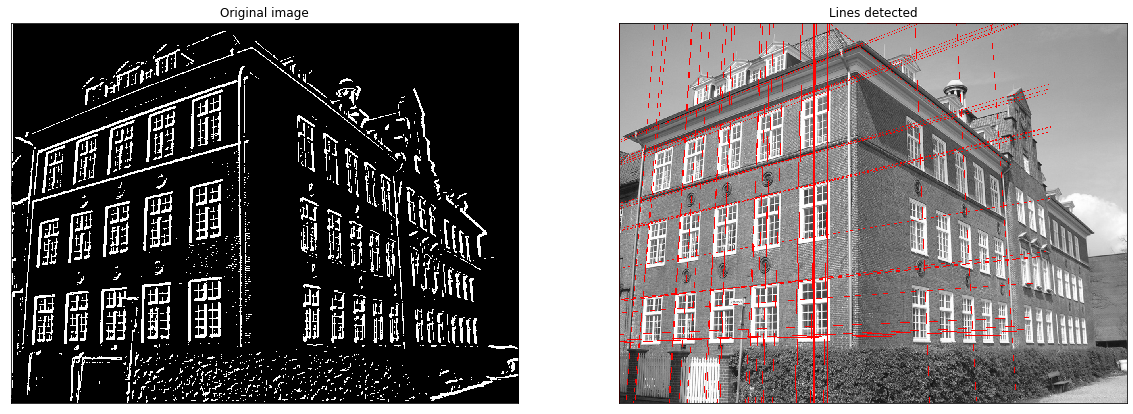

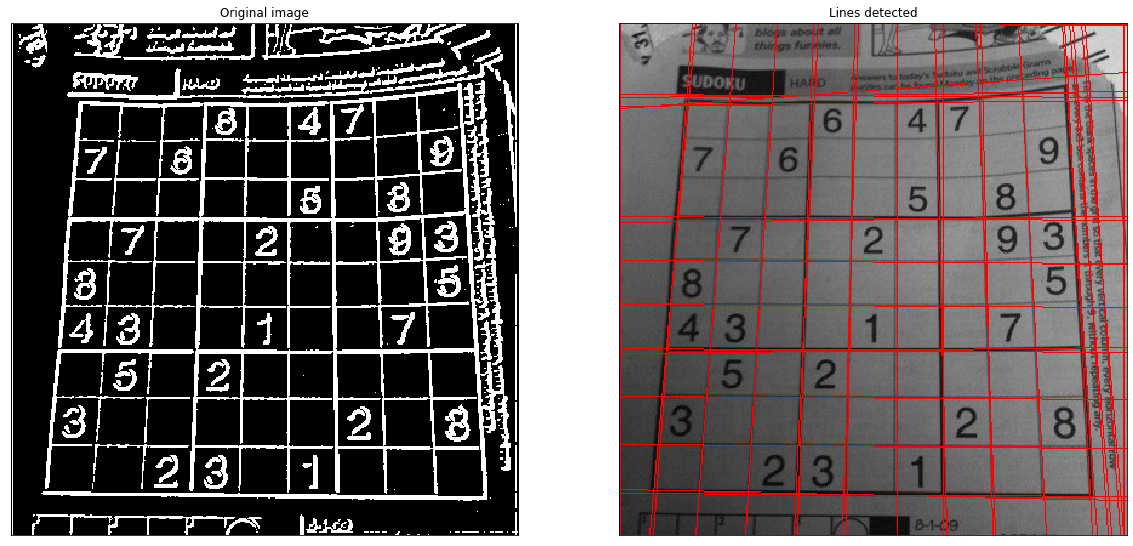

In [8]:
img_0 = load_gray_img("img/building.png")
img_1 = load_gray_img("img/sudoku.png")

edge_img_0 = get_optimal_grads("building", "Sobel")
edge_img_1 = get_optimal_grads("sudoku", "Sobel")

hough_determinist_print(edge_img_0, img_0, 1, 0.015, 360)
hough_determinist_print(edge_img_1, img_1, 1, 0.015, 240)

### Progressive Probabilistic Hough Transform

In [9]:
interact(lambda image, rho, theta, threshold, minLineLength, maxLineGap: 
         hough_probabilist_print(get_optimal_grads(image, "Sobel"),
                                 load_gray_img("img/%s.png" % image),
                                 rho, 
                                 theta, 
                                 threshold,
                                 minLineLength,
                                 maxLineGap), 
         image = ["building", "sudoku", "soccer", "road", "pcb"],
         rho = (1, 10, 1), 
         theta = (np.pi / 360, np.pi / 90, np.pi / 1440), 
         threshold = (30, 80, 10),
         minLineLength = (5, 50, 5), 
         maxLineGap = (5, 50, 5))
pass

interactive(children=(Dropdown(description='image', options=('building', 'sudoku', 'soccer', 'road', 'pcb'), v…

First, for the building, keeping the same error as previously makes sense for the same reasons. The threshold is nevertheless chosen much smaller, 50 is a good trade-off. By choosing minimal length of 30 and a maximal gap between pixels of 5, we get quite good results.

On the sudoku, the same parameters works well too. There is, nevertheless, a little bit of noise. 

We observe that for the building this method is much more suitable compared to the previous. For the sudoku, where the lines are easy to extract, this method allows more noisy detections.

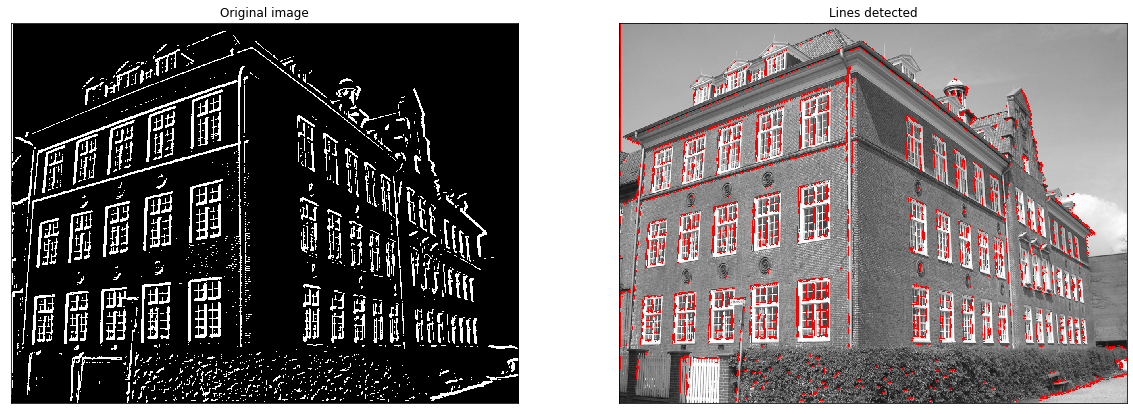

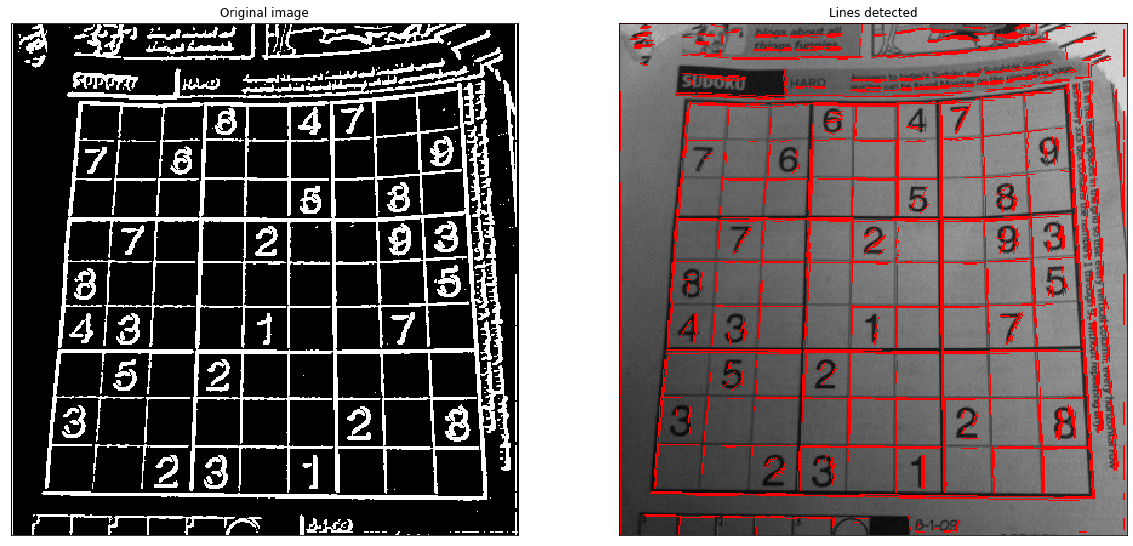

In [10]:
img_0 = load_gray_img("img/building.png")
img_1 = load_gray_img("img/sudoku.png")

edge_img_0 = get_optimal_grads("building", "Sobel")
edge_img_1 = get_optimal_grads("sudoku", "Sobel")


hough_probabilist_print(edge_img_0, img_0, 1, 0.015, 50, 30, 5)
hough_probabilist_print(edge_img_1, img_1, 1, 0.015, 50, 30, 5)

## Line classification

The next and final step to this project is to extract the edges of the image that belong to a line. It is done rather easily in 4 steps : 
* First we extract the edges of the image and apply the Hough transform to get the lines in the image
* Secondly we draw these lines inside a empty image.
* We then convolve this image with the lines by a kernel of ones. This will "widen" the lines by the size of the kernel. It is very useful to extract lines that are more than 1 pixel wide in the image. A small kernel too small kernel will only take the pixels right on the lines, and a big one will take a lot of pixels in the neighbourhood of the lines.
* The final step is simply to compare pixel by pixel the extracted edges with the image with Hough's lines. For each pixel of an edge, we check if the pixel belong to a line in the image computed in the previous step. 

In [13]:
def update_lines(image_name = "building", edges_method = "Sobel", lines_method = "HoughProba", kernel_size = 3):
    img = load_gray_img("img/{}.png".format(image_name))
    
    #Extract the Edges
    edges = get_optimal_grads(image_name, edges_method)
    
    #Create an empty image
    img_w_lines = np.zeros(edges.shape)

    #Get the lines of the images and print them on the empty image
    get_optimal_lines(image_name, edges, img_w_lines, lines_method)
    
    #Convolve the lines and run the pixel-wise comparison with the edges
    final, conv = get_edges_on_lines(edges, img_w_lines, kernel_size)
    
    tools.multiPlot(1, 4, 
        (edges, img_w_lines, conv, final),
        ('Edges', 'Lines detected', 'Convolved lines', 'Only Edges on Lines'),
        cmap_tuple=(cm.gray, cm.gray, cm.gray, cm.gray))
    
interact(update_lines,
        image_name = ["building", "sudoku", "soccer", "road", "pcb"],
        edges_method = ["Sobel", "Scharr", "Naive Gradient", "Beucher", "Canny", "Stacking"],
        lines_method = ["Hough", "HoughProba"], 
        kernel_size = (1, 7, 2))


interactive(children=(Dropdown(description='image_name', options=('building', 'sudoku', 'soccer', 'road', 'pcb…

<function __main__.update_lines(image_name='building', edges_method='Sobel', lines_method='HoughProba', kernel_size=3)>

For the images for which we didn't tune the parameters of the Hough transform, the parameters of the building image were used.

We can see that we have decent results for both the sudoku and the building for wchich we tuned the parameters. For the others images, since the edges are not well caputured, the lines are also not well defined. 